In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
df= sns.load_dataset('titanic')

In [8]:
X=df[['pclass','sex','age','sibsp','parch','fare']]
y=df['survived']

In [9]:
X = pd.get_dummies(X, columns=['sex']) # convert sex(male/female) to binary number to compute easily

In [10]:
X.isnull().sum()

pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_female      0
sex_male        0
dtype: int64

In [11]:
X.age.fillna(value=X['age'].mean(),inplace=True)

In [12]:
X.isnull().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_female    0
sex_male      0
dtype: int64

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [14]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
y_pred=model.predict(X_test)

In [16]:
print("Accuracy: ", accuracy_score(y_test,y_pred))

Accuracy:  0.7653631284916201


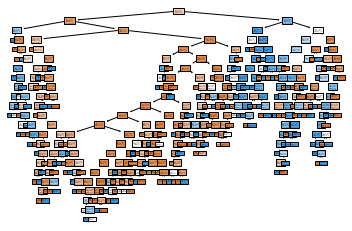

<Figure size 432x288 with 0 Axes>

In [17]:
tree.plot_tree(model.fit(X,y), filled=True)
plt.show()
plt.savefig("tree.png")

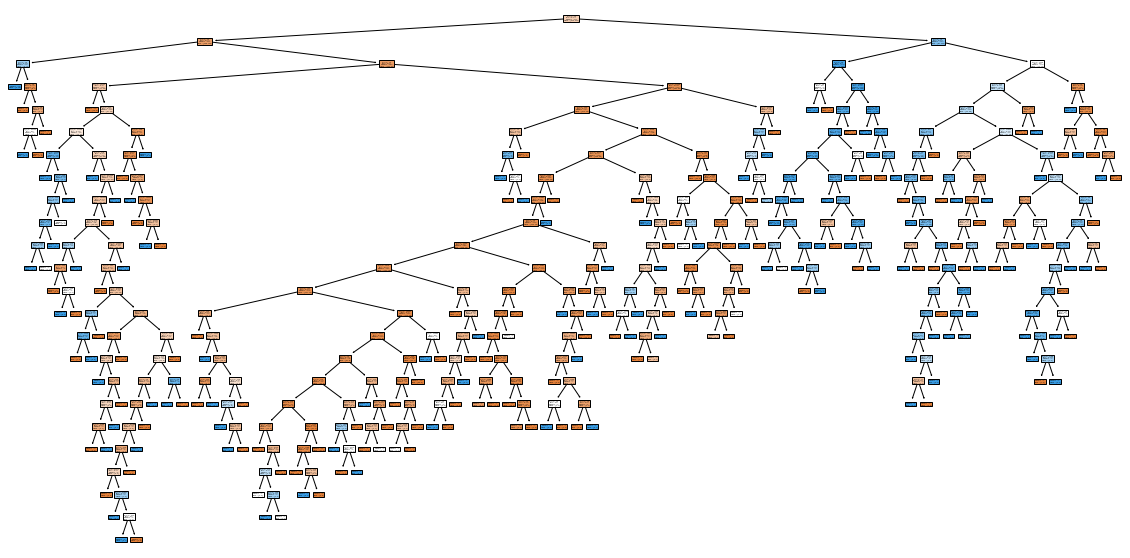

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(model.fit(X,y), filled=True)
plt.show()
plt.savefig("decision_tree.pdf", format='pdf',dpi=300)

In [20]:
# precision 
from sklearn.metrics import precision_score, recall_score, f1_score
precision= precision_score(y_test,y_pred)
precision

0.7333333333333333

In [21]:
recall_score(y_test,y_pred)

0.7142857142857143

In [22]:
f1_score(y_test,y_pred)

0.7236842105263158

In [25]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)

<AxesSubplot:>

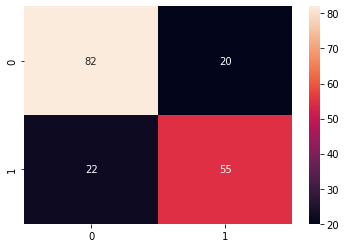

In [27]:
sns.heatmap(cm, annot=True)

# K Nearest Neighbours (KNN)

In [31]:
from sklearn.neighbors import KNeighborsClassifier 
model= KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
cm

array([[76, 26],
       [33, 44]], dtype=int64)

In [33]:
precision_score(y_test,y_pred)

0.6285714285714286

In [34]:
recall_score(y_test,y_pred)

0.5714285714285714

## Hyper parameter tuning -- search on it.. very important to understand

<AxesSubplot:>

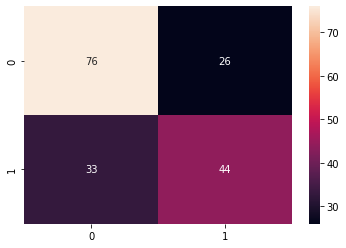

In [32]:
sns.heatmap(cm, annot=True)

# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ", cm)
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("f1 Score: ", f1_score(y_test, y_pred))

Confusion Matrix:  [[88 14]
 [18 59]]
Precision Score:  0.8082191780821918
Recall Score:  0.7662337662337663
f1 Score:  0.7866666666666666


# Logistic Regression 
its a classification matrix not for regression

In [40]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ", cm)
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("f1 Score: ", f1_score(y_test, y_pred))

Confusion Matrix:  [[89 13]
 [23 54]]
Precision Score:  0.8059701492537313
Recall Score:  0.7012987012987013
f1 Score:  0.75


c:\Users\Rizwan Rizwan\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Support Vector Machine (SVM)

In [42]:
from sklearn.svm import SVC
model= SVC()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ", cm)
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("f1 Score: ", f1_score(y_test, y_pred))

Confusion Matrix:  [[93  9]
 [53 24]]
Precision Score:  0.7272727272727273
Recall Score:  0.3116883116883117
f1 Score:  0.4363636363636364


# Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ", cm)
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("f1 Score: ", f1_score(y_test, y_pred))

Confusion Matrix:  [[85 17]
 [24 53]]
Precision Score:  0.7571428571428571
Recall Score:  0.6883116883116883
f1 Score:  0.7210884353741497


In [46]:
# libraries and model import 
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# define the models to be evaluated
models= [LogisticRegression(),KNeighborsClassifier(),RandomForestClassifier(),SVC()]
names=['Logistic Regression','KNN', 'Random Forest', 'SVM']

# perform k-fold cross-validation for each model
k=10
for name, model in zip(names, models):
    cv_scores=cross_val_score(model,X_train,y_train, cv=k)
    print(f"{name} cv accuracy: {np.mean(cv_scores):.3f} +/-{np.std(cv_scores):.3f}")


c:\Users\Rizwan Rizwan\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\Users\Rizwan Rizwan\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:


Logistic Regression cv accuracy: 0.796 +/-0.031
KNN cv accuracy: 0.715 +/-0.051
Random Forest cv accuracy: 0.812 +/-0.031
SVM cv accuracy: 0.683 +/-0.045
